# Determinant QMC data visualization

## Load simulation data

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as rd
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

sns.set()

# Are you testing (0) or making plots (1)?

SAVEPLOTS = bool(0) # 0 for false, 1 for true

# Retrieve simulation parameters

simulationParameters = np.loadtxt('simulationParameters.txt', usecols = 1)

NSITES = int(simulationParameters[0])
dt = simulationParameters[1]
beta = simulationParameters[2]
L = int(simulationParameters[3])
t = simulationParameters[4]
U = simulationParameters[5]
mu = simulationParameters[6]
totalMCSweeps = int(simulationParameters[7])
freq = int(simulationParameters[8])
intsize = int(simulationParameters[9])

# Load weights to plot

measurements = np.loadtxt('controlMeasurements.txt', skiprows = 1)

weights = measurements[:, 0]

M = weights.size

time = np.arange(M) + 1  #measured in sweeps

directory1 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

directory2 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '/data-to-reproduce')
            
#if not os.path.exists(directory1):
#    os.makedirs(directory1)
    
#if not os.path.exists(directory2):
#    os.makedirs(directory2)
    
#np.savetxt(directory2 + '/weights_' + \
#           'totalMCSweeps_' + str(totalMCSweeps) + \
#           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (weights))
#np.savetxt(directory2 + '/simulationParameters_' + \
#           'totalMCSweeps_' + str(totalMCSweeps) + \
#           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (simulationParameters))

# Metropolis Sampling convergence

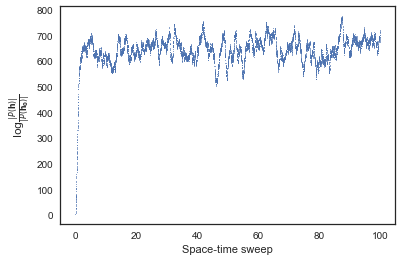

In [16]:
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.scatter(time / L, weights, s = 0.3)
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/weightsVsMCsweep' + str(totalMCSweeps) + 'sweeps' + '_freq_' + str(freq)
            + '_intsize_' + str(intsize) + '.png', dpi = 600)

# Sign problem

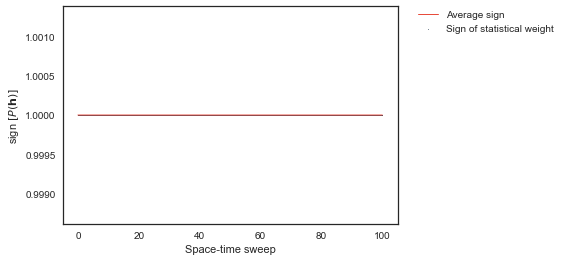

In [20]:
sns.set_style("white")
signs = measurements[:, 1]
avSign = np.mean(signs) * np.ones(len(time))
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.set_color_codes("dark")

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'sign' + r' $[P(\mathbf{h})]$ ')

ax.scatter(time / L, signs, s = 0.3, color = "#34495e", label = 'Sign of statistical weight')
ax.plot(time / L, avSign, linewidth = 1, color = "#e74c3c", label = 'Average sign')
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/avSign' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600,
                bbox_extra_artists=(lgd,), bbox_inches='tight')

# Measuments

In [5]:
observables = np.loadtxt('measurementsScalars.txt', skiprows = 1)
sweeps = np.arange(M / L) + 1

## Electron density

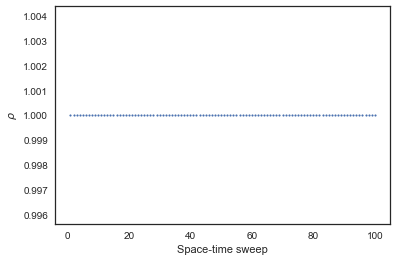

In [7]:
electronDensity = observables[:, 0]
#np.savetxt(directory2 + '/electronDensity' + str(totalMCSweeps) + \
#           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (electronDensity))
plt.scatter(sweeps, electronDensity, s = 3)
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'$\rho$')
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/electronDensity' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600)

## Double occupancy

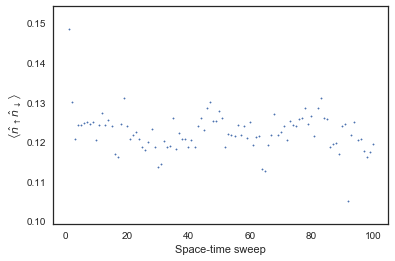

In [8]:
doubleOc = observables[:, 1]
#np.savetxt(directory2 + '/doubleOc' + str(totalMCSweeps) + \
#           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (doubleOc))
plt.scatter(sweeps, doubleOc, s = 2)
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'$\left\langle \hat{n}_\uparrow \hat{n}_\downarrow \right\rangle$')
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/doubleOc' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600)

## Auto-correlation time for double occupancy $\left\langle n_\uparrow n_\downarrow \right \rangle$

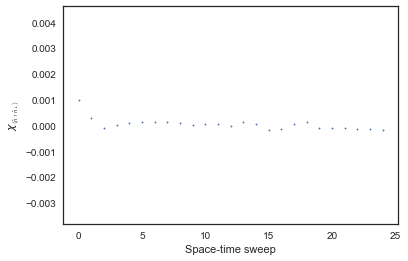

In [10]:
m = np.mean(doubleOc)
tMax = int(totalMCSweeps / 4)
chi_nUp_nDown = np.zeros(tMax)
doubleTrunc = doubleOc[:tMax]

for t in range(tMax):
    chi_nUp_nDown[t] = np.sum( ( doubleOc[:tMax] - m ) * ( doubleOc[t:t + tMax] - m ) )

#np.savetxt(directory2 + '/doubleOc' + str(totalMCSweeps) + \
#       '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (doubleOc))
plt.scatter(np.arange(tMax), chi_nUp_nDown, s = 2)
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'$\chi_{_{\left\langle \hat{n}_\uparrow \hat{n}_\downarrow \right\rangle}}$')
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/doubleOcAutoCorr' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600)

# Magnetic structure factor $S(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf i - \mathbf j)} \left\langle \mathbf S_{\mathbf i} \cdot \mathbf S_{\mathbf j} \right\rangle $

## Auto-correlation time in the measurement of the correlation function

Text(0,0.5,'$\\chi_{_{<\\mathbf{S}_0^{\\quad 2}>}}$')

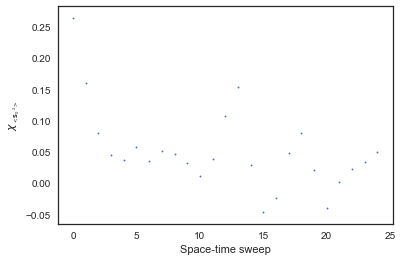

In [11]:
import cmath as cm

magCorrMeas = np.loadtxt('SpinSpinCorrelations.txt', skiprows = 1)
magCorr = np.zeros((NSITES, NSITES))
chiMag = np.zeros(tMax)
corrZeroZero = np.zeros(totalMCSweeps)

for m in range(totalMCSweeps):
    corrZeroZero[m] = magCorrMeas[m*NSITES:(m+1)*NSITES][0, 0]

meanCorr = np.mean(corrZeroZero)

for t in range(tMax):
    chiMag[t] = np.sum( ( corrZeroZero[:tMax] - meanCorr ) * ( corrZeroZero[t:t + tMax] - meanCorr ) )
    
plt.scatter(np.arange(tMax), chiMag[:tMax], s = 2)
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'$\chi_{_{<\mathbf{S}_0^{\quad 2}>}}$')

## Average spin-spin correlation function

In [12]:
W = 20 # warm-up steps
autoCorrTime = 10

for m in range(totalMCSweeps - W):
    if m % autoCorrTime == 0:    
        magCorr += ( magCorrMeas[(m+autoCorrTime)*NSITES:(m + 1 + autoCorrTime )*NSITES] \
                    - magCorr ) / ( m / autoCorrTime + 1)

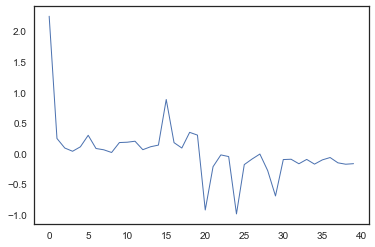

In [13]:
plt.plot(np.arange(NSITES), magCorr[0, :], linewidth = 1)

## Fourier transform to obtain the structure factor    

Text(0,0.5,'$S(q)$')

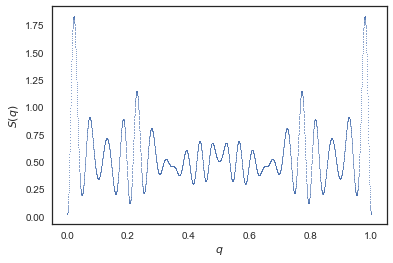

In [14]:
n_qs = 5000
qMax = 2*np.pi
qs = np.arange(0, qMax + qMax/n_qs, qMax/n_qs)
S = np.zeros(n_qs+1)*1j

for idx, q in enumerate(qs):
    for x in range(NSITES):
        for y in range(NSITES):
            S[idx] += cm.exp( ( x - y) * q  * 1j) * magCorr[x, y]

S /= (4 * NSITES) # factor of 4 comes from 1/2 spins

plt.scatter(qs/2/np.pi, S.real, s = 0.3)
plt.xlabel(r'$q$')
plt.ylabel(r'$S(q)$')

### It has a maximum at $q = \pi$ signaling quasi-AF order

In [100]:
qs[np.argmax(S)]

3.1415926535897931

# Magnetic susceptibility $\chi(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf i - \mathbf j)} \int_0^\beta \left\langle \mathbf S_{\mathbf i}(\tau) \cdot \mathbf S_{\mathbf j}(0) \right\rangle d\tau $

In [101]:
UneqMagCorrMeas = np.loadtxt('UneqTimeSpinSpinCorrelations.txt', skiprows = 1)

UneqMagCorr = np.zeros((NSITES, NSITES))

# Average unequal time spin-spin correlation function

for m in range(totalMCSweeps):
    UneqMagCorr += ( UneqMagCorrMeas[m*NSITES:(m+1)*NSITES] - UneqMagCorr ) / ( m + 1)
    
# Compute structure factor    
    
n_qs = 5000
qMax = 2*np.pi
qs = np.arange(0, qMax + qMax/n_qs, qMax/n_qs)
MagSus = np.zeros(n_qs+1)*1j

for idx, q in enumerate(qs):
    for x in range(NSITES):
        for y in range(NSITES):
            MagSus[idx] += cm.exp( ( x - y) * q  * 1j) * UneqMagCorr[x, y]

MagSus /= (4 * NSITES) / dt # factor of 4 comes from 1/2 spins

plt.scatter(qs/2 /np.pi, MagSus.real, s = 0.5)
plt.xlabel(r'q')
plt.ylabel(r'$\chi(q)$')

FileNotFoundError: [Errno 2] No such file or directory: 'UneqTimeSpinSpinCorrelations.txt'

In [339]:
tMax = int(totalMCSweeps / 2)
autoCorr = np.zeros(tMax)
Uneq = np.zeros(totalMCSweeps)
for m in range(totalMCSweeps):
    Uneq[m] = UneqMagCorrMeas[m*NSITES:(m+1)*NSITES][0, 1]
av = Uneq.mean()

In [340]:
av

-2320.7190071229002

In [341]:
for t in range(tMax):
    autoCorr[t] = np.sum( ( Uneq[:tMax] - av ) * ( Uneq[t:t + tMax] - av ) )


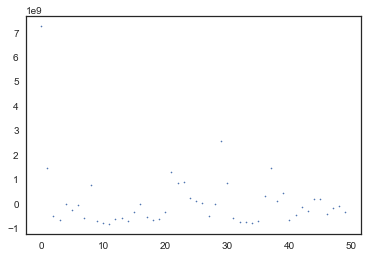

In [347]:
plt.scatter(np.arange(tMax), autoCorr, s = 1.5)